/home/hp/Text_summarisation/summarisation/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hp/Text_summarisation/summarisation/venv/lib/python3.8/site-packages/datasets/load.py:1461: FutureWarning: The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


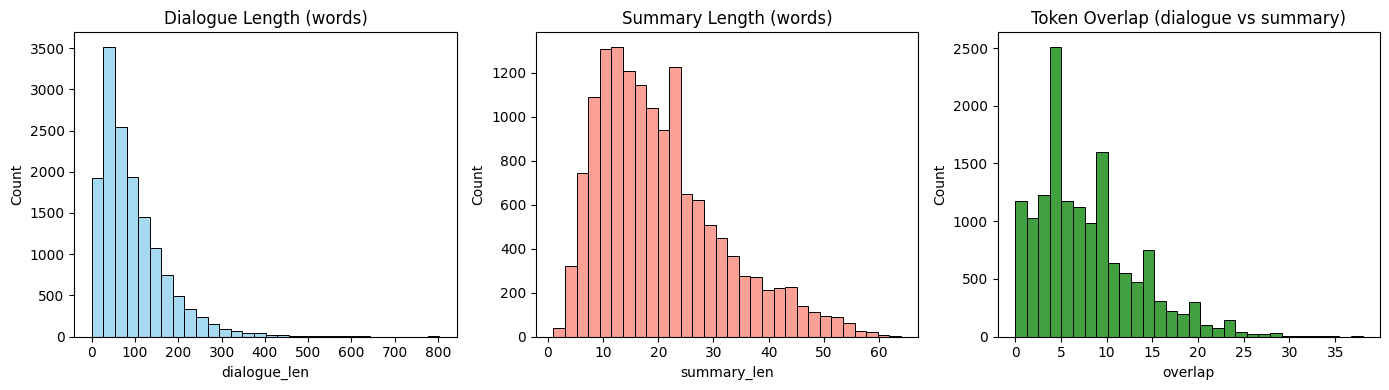

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load samsum
dataset = load_dataset("samsum")
train_data = dataset["train"]

# Convert to DataFrame
df = pd.DataFrame(train_data)

# Length of dialogues and summaries
df['dialogue_len'] = df['dialogue'].apply(lambda x: len(x.split()))
df['summary_len'] = df['summary'].apply(lambda x: len(x.split()))
df['overlap'] = df.apply(lambda row: len(set(row['dialogue'].split()) & set(row['summary'].split())), axis=1)

# Plot distributions
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['dialogue_len'], bins=30, color="skyblue")
plt.title("Dialogue Length (words)")

plt.subplot(1, 3, 2)
sns.histplot(df['summary_len'], bins=30, color="salmon")
plt.title("Summary Length (words)")

plt.subplot(1, 3, 3)
sns.histplot(df['overlap'], bins=30, color="green")
plt.title("Token Overlap (dialogue vs summary)")

plt.tight_layout()
plt.show()
